Bikram Rumba

MSCS 634 - Advanced Big Data and Data Mining

Clustering Techniques Using DBSCAN and Hierarchical Clustering


DATA PREPARATION AND EXPLORATION

1.1 Dataset Structure - First 5 rows:
   alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0    14.23        1.71  2.43               15.6      127.0           2.80   
1    13.20        1.78  2.14               11.2      100.0           2.65   
2    13.16        2.36  2.67               18.6      101.0           2.80   
3    14.37        1.95  2.50               16.8      113.0           3.85   
4    13.24        2.59  2.87               21.0      118.0           2.80   

   flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32 

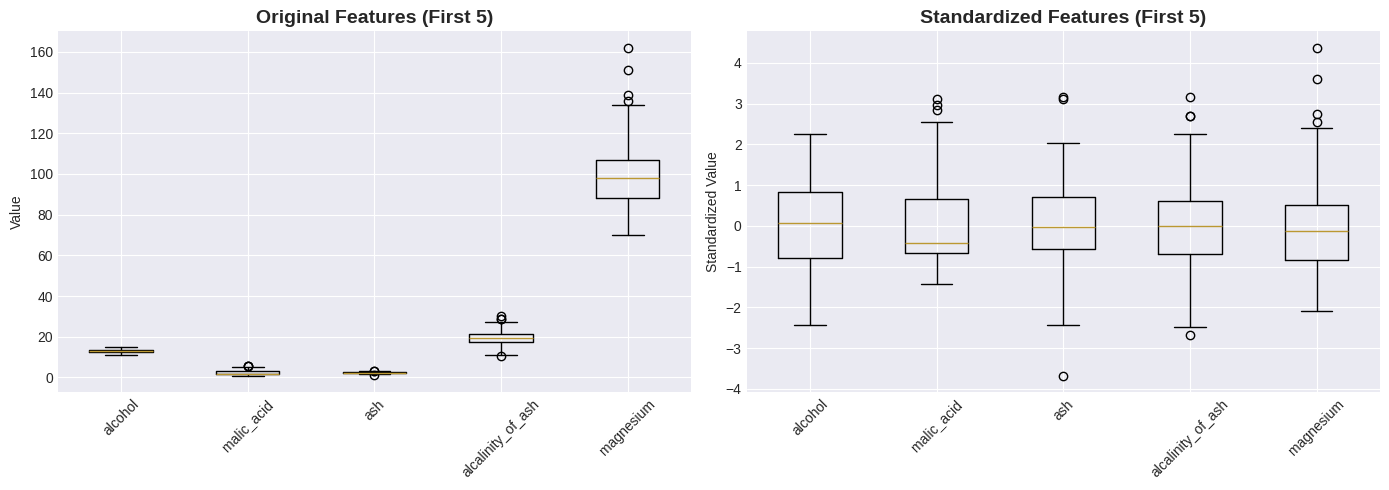

In [6]:
  # Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering, DBSCAN
from sklearn.metrics import silhouette_score, homogeneity_score, completeness_score
from scipy.cluster.hierarchy import dendrogram, linkage
import warnings
warnings.filterwarnings('ignore')

# Set plot style
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

print("="*70)
print("DATA PREPARATION AND EXPLORATION")
print("="*70)

# Load the Wine dataset
wine = load_wine()
X = wine.data
y = wine.target

# Create a DataFrame for easier exploration
df = pd.DataFrame(X, columns=wine.feature_names)
df['target'] = y

print("\n1.1 Dataset Structure - First 5 rows:")
print(df.head())

print("\n1.2 Dataset Information:")
print(df.info())

print("\n1.3 Statistical Summary:")
print(df.describe())

print(f"\n1.4 Dataset Shape: {df.shape}")
print(f"Number of features: {len(wine.feature_names)}")
print(f"Number of samples: {len(df)}")
print(f"Target classes: {wine.target_names}")
print(f"Class distribution:\n{df['target'].value_counts().sort_index()}")

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print("\n1.5 Feature Standardization Complete")
print(f"Original data mean: {X.mean():.2f}, std: {X.std():.2f}")
print(f"Scaled data mean: {X_scaled.mean():.2f}, std: {X_scaled.std():.2f}")

# Visualize feature distributions before and after scaling
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Before scaling
axes[0].boxplot(X[:, :5], labels=wine.feature_names[:5])
axes[0].set_title('Original Features (First 5)', fontsize=14, fontweight='bold')
axes[0].set_ylabel('Value')
axes[0].tick_params(axis='x', rotation=45)

# After scaling
axes[1].boxplot(X_scaled[:, :5], labels=wine.feature_names[:5])
axes[1].set_title('Standardized Features (First 5)', fontsize=14, fontweight='bold')
axes[1].set_ylabel('Standardized Value')
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


HIERARCHICAL CLUSTERING

2.2 Hierarchical Clustering with 2 clusters:
   Silhouette Score: 0.2670
   Homogeneity Score: 0.4441
   Completeness Score: 0.7745

2.3 Hierarchical Clustering with 3 clusters:
   Silhouette Score: 0.2774
   Homogeneity Score: 0.7904
   Completeness Score: 0.7825

2.4 Hierarchical Clustering with 4 clusters:
   Silhouette Score: 0.2258
   Homogeneity Score: 0.7904
   Completeness Score: 0.6490

2.5 Hierarchical Clustering with 5 clusters:
   Silhouette Score: 0.1867
   Homogeneity Score: 0.8106
   Completeness Score: 0.5762


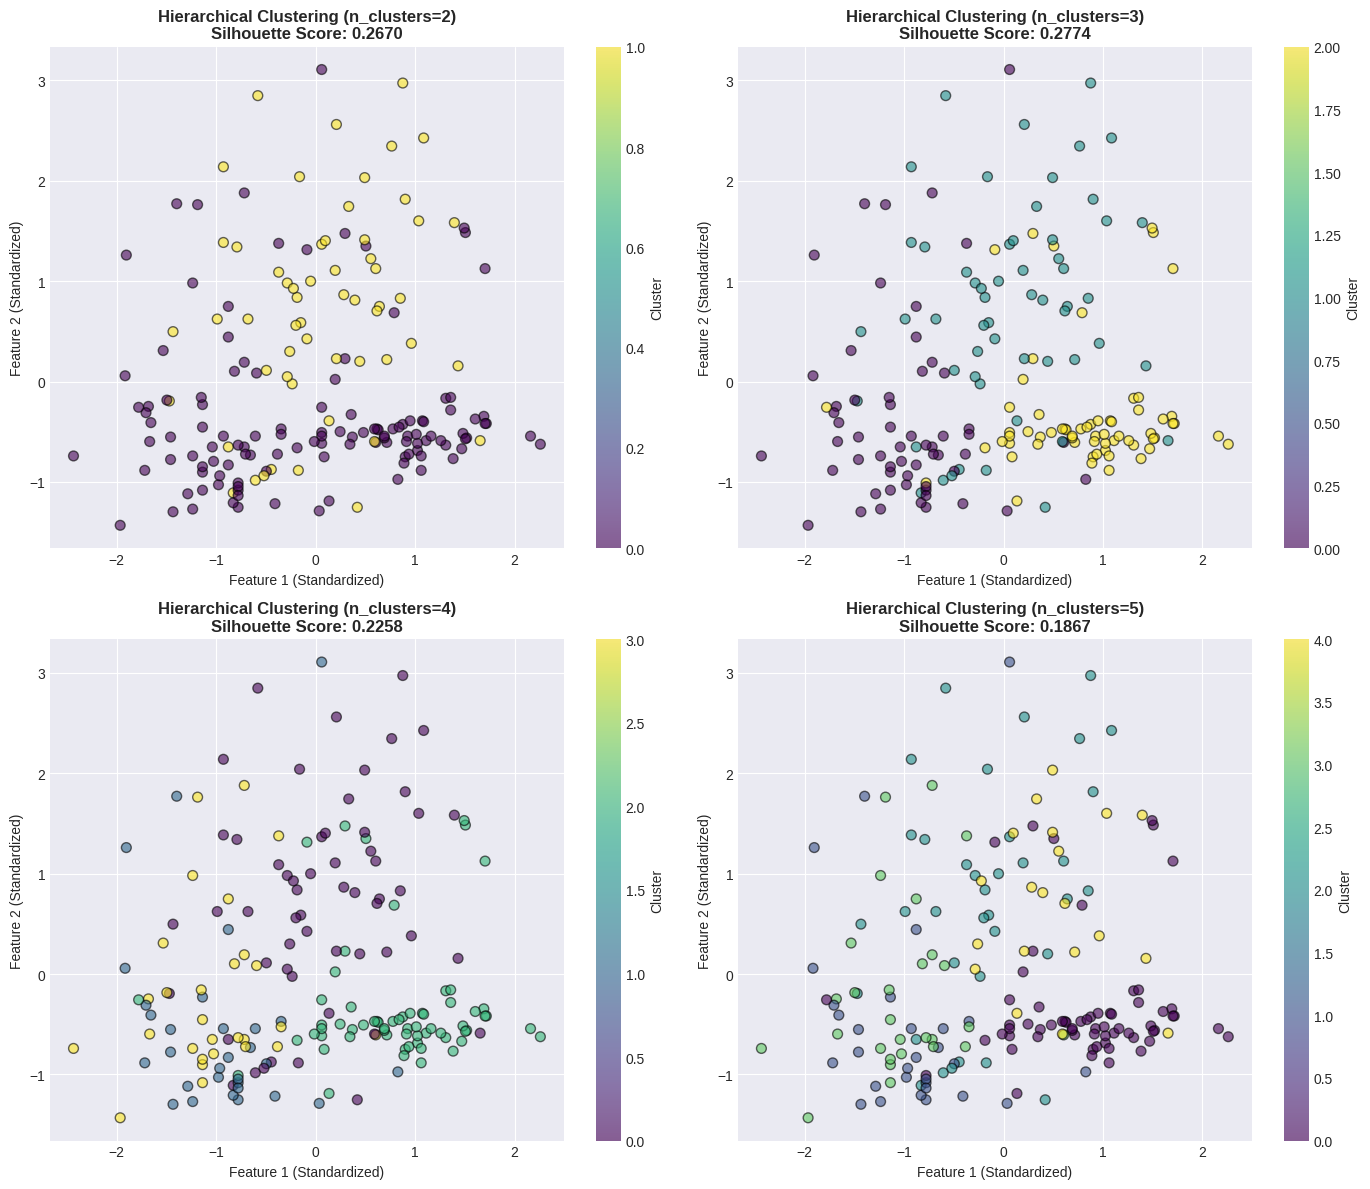


2.5 Generating Dendrogram...


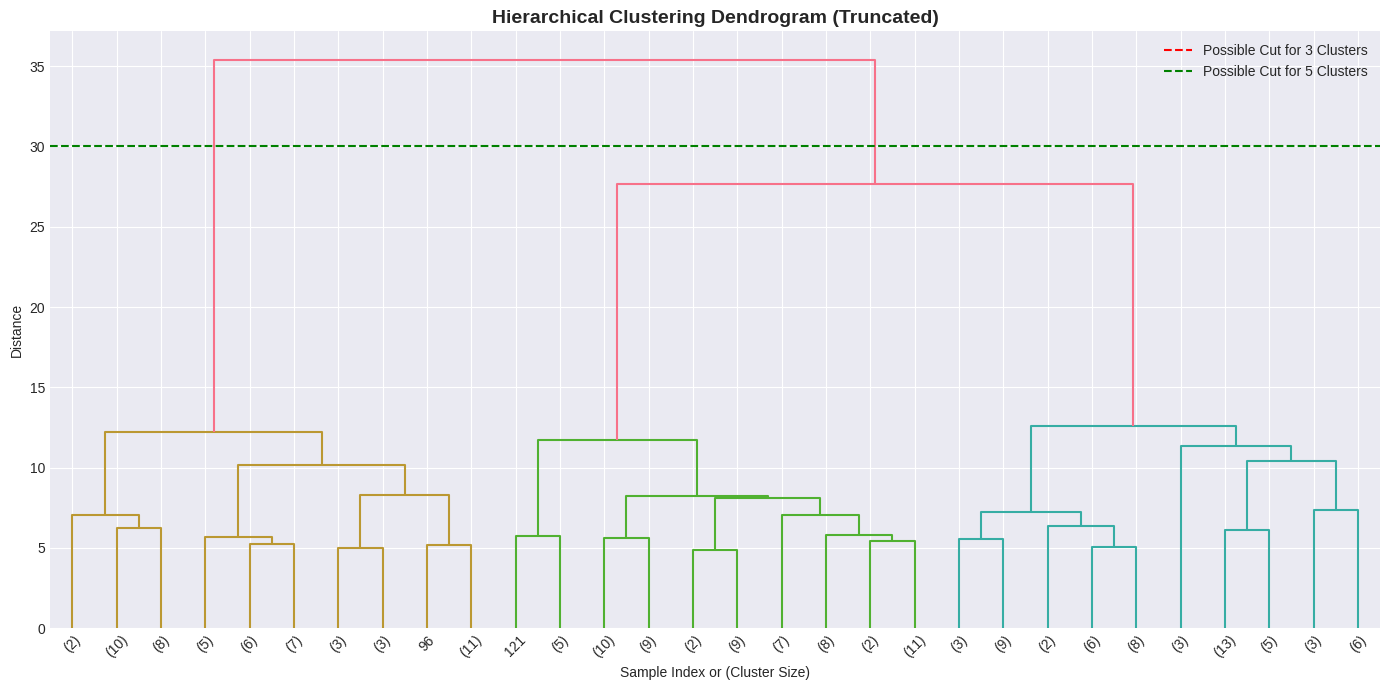

In [7]:
print("\n" + "="*70)
print("HIERARCHICAL CLUSTERING")
print("="*70)

# Test different numbers of clusters
n_clusters_list = [2, 3, 4, 5]
hierarchical_results = {}

for n_clust in n_clusters_list:
    # Apply Agglomerative Clustering
    hierarchical = AgglomerativeClustering(n_clusters=n_clust, linkage='ward')
    labels = hierarchical.fit_predict(X_scaled)

    # Calculate metrics
    silhouette = silhouette_score(X_scaled, labels)
    homogeneity = homogeneity_score(y, labels)
    completeness = completeness_score(y, labels)

    hierarchical_results[n_clust] = {
        'labels': labels,
        'silhouette': silhouette,
        'homogeneity': homogeneity,
        'completeness': completeness
    }

    print(f"\n2.{n_clust} Hierarchical Clustering with {n_clust} clusters:")
    print(f"   Silhouette Score: {silhouette:.4f}")
    print(f"   Homogeneity Score: {homogeneity:.4f}")
    print(f"   Completeness Score: {completeness:.4f}")

# Visualize clusters for different n_clusters
fig, axes = plt.subplots(2, 2, figsize=(14, 12))
axes = axes.ravel()

for idx, n_clust in enumerate(n_clusters_list):
    labels = hierarchical_results[n_clust]['labels']
    silhouette = hierarchical_results[n_clust]['silhouette']

    # Use first two principal components for visualization
    scatter = axes[idx].scatter(X_scaled[:, 0], X_scaled[:, 1],
                                c=labels, cmap='viridis',
                                s=50, alpha=0.6, edgecolors='k')
    axes[idx].set_title(f'Hierarchical Clustering (n_clusters={n_clust})\nSilhouette Score: {silhouette:.4f}',
                        fontsize=12, fontweight='bold')
    axes[idx].set_xlabel('Feature 1 (Standardized)')
    axes[idx].set_ylabel('Feature 2 (Standardized)')
    plt.colorbar(scatter, ax=axes[idx], label='Cluster')

plt.tight_layout()
plt.show()

# Generate and visualize dendrogram
print("\n2.5 Generating Dendrogram...")
plt.figure(figsize=(14, 7))
linkage_matrix = linkage(X_scaled, method='ward')
dendrogram(linkage_matrix,
           truncate_mode='lastp',
           p=30,
           show_leaf_counts=True,
           leaf_font_size=10)
plt.title('Hierarchical Clustering Dendrogram (Truncated)', fontsize=14, fontweight='bold')
plt.xlabel('Sample Index or (Cluster Size)')
plt.ylabel('Distance')
plt.axhline(y=50, color='r', linestyle='--', label='Possible Cut for 3 Clusters')
plt.axhline(y=30, color='g', linestyle='--', label='Possible Cut for 5 Clusters')
plt.legend()
plt.tight_layout()
plt.show()


DBSCAN CLUSTERING

3.1 Testing DBSCAN with different parameters:
----------------------------------------------------------------------
eps=0.5, min_samples=3: Clusters=0, Noise=178, Silhouette=0.0000
eps=0.5, min_samples=5: Clusters=0, Noise=178, Silhouette=0.0000
eps=0.5, min_samples=10: Clusters=0, Noise=178, Silhouette=0.0000
eps=1.0, min_samples=3: Clusters=0, Noise=178, Silhouette=0.0000
eps=1.0, min_samples=5: Clusters=0, Noise=178, Silhouette=0.0000
eps=1.0, min_samples=10: Clusters=0, Noise=178, Silhouette=0.0000
eps=1.5, min_samples=3: Clusters=8, Noise=147, Silhouette=0.3311
eps=1.5, min_samples=5: Clusters=0, Noise=178, Silhouette=0.0000
eps=1.5, min_samples=10: Clusters=0, Noise=178, Silhouette=0.0000
eps=2.0, min_samples=3: Clusters=5, Noise=64, Silhouette=0.2113
eps=2.0, min_samples=5: Clusters=5, Noise=85, Silhouette=0.2405
eps=2.0, min_samples=10: Clusters=1, Noise=139, Silhouette=0.0000

3.2 Visualizing DBSCAN Results:


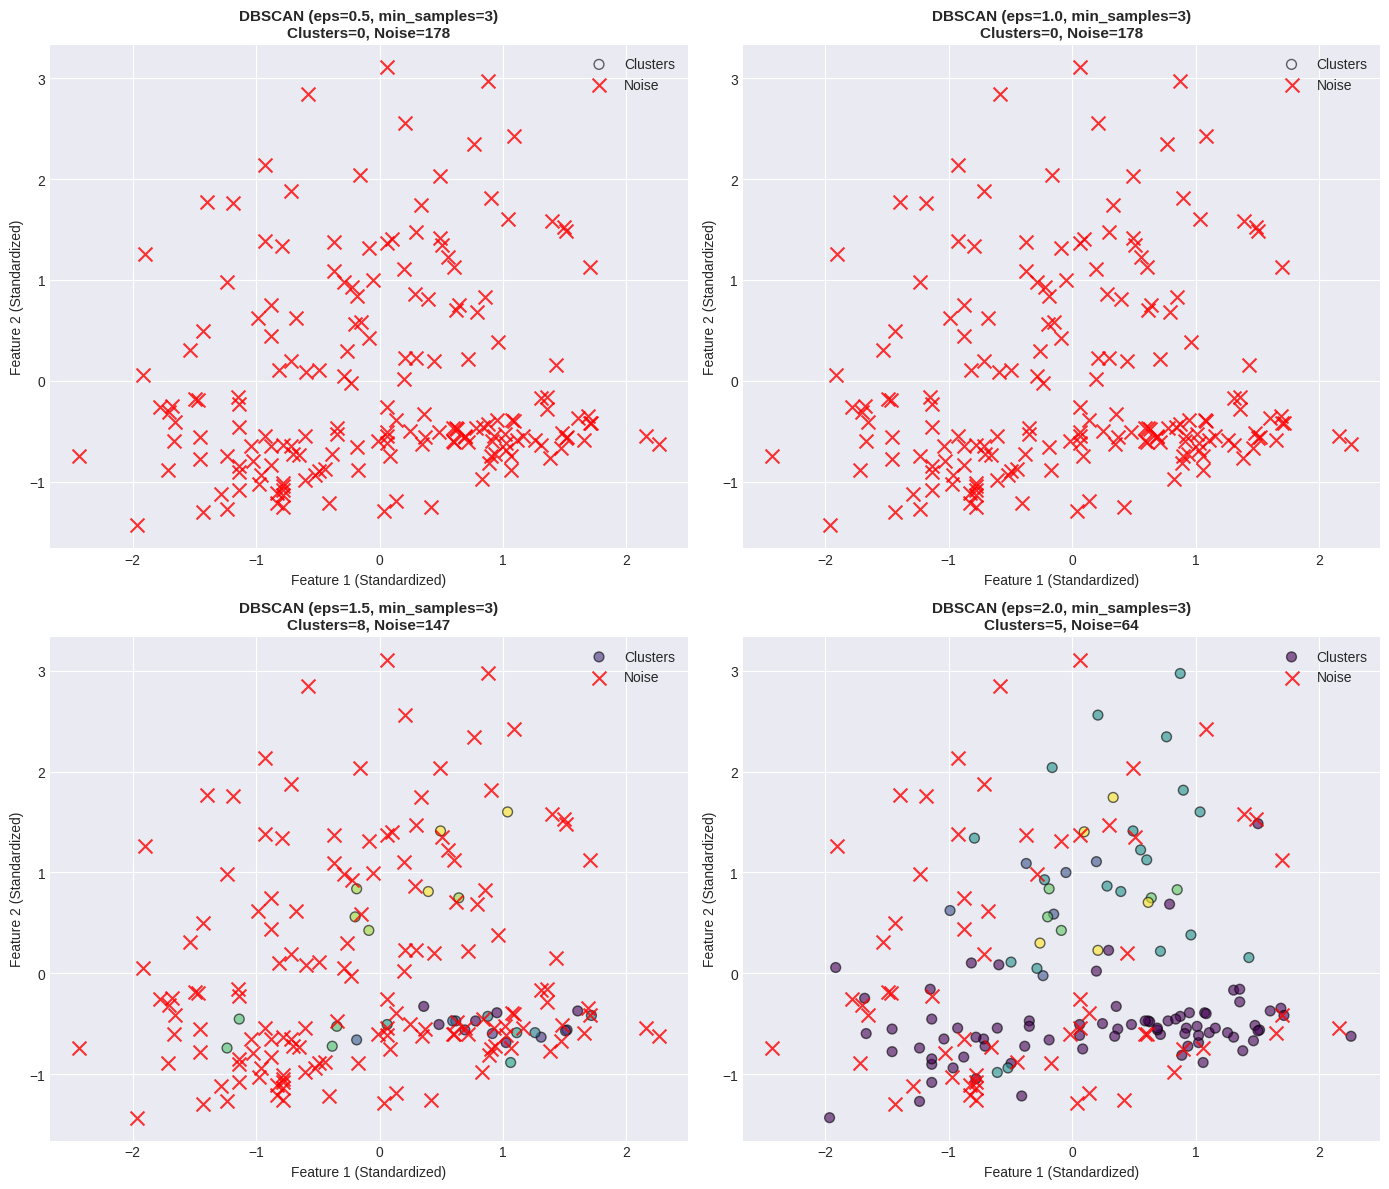


3.3 Best DBSCAN Configuration (by Silhouette Score):
   eps: 1.5
   min_samples: 3
   Number of clusters: 8
   Noise points: 147
   Silhouette Score: 0.3311
   Homogeneity Score: 1.0000
   Completeness Score: 0.4319


In [8]:

print("\n" + "="*70)
print("DBSCAN CLUSTERING")
print("="*70)

# Test different parameter combinations
eps_values = [0.5, 1.0, 1.5, 2.0]
min_samples_values = [3, 5, 10]

dbscan_results = []

print("\n3.1 Testing DBSCAN with different parameters:")
print("-" * 70)

for eps in eps_values:
    for min_samp in min_samples_values:
        # Apply DBSCAN
        dbscan = DBSCAN(eps=eps, min_samples=min_samp)
        labels = dbscan.fit_predict(X_scaled)

        # Count clusters and noise points
        n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
        n_noise = list(labels).count(-1)

        # Calculate metrics (only if we have more than 1 cluster)
        if n_clusters > 1:
            # Exclude noise points for silhouette score
            mask = labels != -1
            if sum(mask) > 0:
                silhouette = silhouette_score(X_scaled[mask], labels[mask])
                homogeneity = homogeneity_score(y[mask], labels[mask])
                completeness = completeness_score(y[mask], labels[mask])
            else:
                silhouette = homogeneity = completeness = 0.0
        else:
            silhouette = homogeneity = completeness = 0.0

        dbscan_results.append({
            'eps': eps,
            'min_samples': min_samp,
            'n_clusters': n_clusters,
            'n_noise': n_noise,
            'labels': labels,
            'silhouette': silhouette,
            'homogeneity': homogeneity,
            'completeness': completeness
        })

        print(f"eps={eps}, min_samples={min_samp}: "
              f"Clusters={n_clusters}, Noise={n_noise}, "
              f"Silhouette={silhouette:.4f}")

# Visualize best DBSCAN results
print("\n3.2 Visualizing DBSCAN Results:")

# Select 4 interesting parameter combinations
selected_indices = [0, 3, 6, 9]  # Different combinations for visualization
fig, axes = plt.subplots(2, 2, figsize=(14, 12))
axes = axes.ravel()

for idx, result_idx in enumerate(selected_indices):
    result = dbscan_results[result_idx]
    labels = result['labels']
    eps = result['eps']
    min_samp = result['min_samples']

    # Separate noise and cluster points
    core_mask = labels != -1

    # Plot clusters
    scatter = axes[idx].scatter(X_scaled[core_mask, 0], X_scaled[core_mask, 1],
                                c=labels[core_mask], cmap='viridis',
                                s=50, alpha=0.6, edgecolors='k', label='Clusters')

    # Plot noise points
    if sum(~core_mask) > 0:
        axes[idx].scatter(X_scaled[~core_mask, 0], X_scaled[~core_mask, 1],
                         c='red', marker='x', s=100, alpha=0.8, label='Noise')

    axes[idx].set_title(f'DBSCAN (eps={eps}, min_samples={min_samp})\n'
                        f'Clusters={result["n_clusters"]}, Noise={result["n_noise"]}',
                        fontsize=11, fontweight='bold')
    axes[idx].set_xlabel('Feature 1 (Standardized)')
    axes[idx].set_ylabel('Feature 2 (Standardized)')
    axes[idx].legend()

plt.tight_layout()
plt.show()

# Find best DBSCAN configuration based on silhouette score
best_dbscan = max([r for r in dbscan_results if r['n_clusters'] > 1],
                  key=lambda x: x['silhouette'])

print(f"\n3.3 Best DBSCAN Configuration (by Silhouette Score):")
print(f"   eps: {best_dbscan['eps']}")
print(f"   min_samples: {best_dbscan['min_samples']}")
print(f"   Number of clusters: {best_dbscan['n_clusters']}")
print(f"   Noise points: {best_dbscan['n_noise']}")
print(f"   Silhouette Score: {best_dbscan['silhouette']:.4f}")
print(f"   Homogeneity Score: {best_dbscan['homogeneity']:.4f}")
print(f"   Completeness Score: {best_dbscan['completeness']:.4f}")



 ANALYSIS AND INSIGHTS

4.1 COMPARISON OF CLUSTERING METHODS
----------------------------------------------------------------------

Best Hierarchical Clustering (n_clusters=3):
   Silhouette Score: 0.2774
   Homogeneity Score: 0.7904
   Completeness Score: 0.7825

Best DBSCAN Clustering:
   Silhouette Score: 0.3311
   Homogeneity Score: 1.0000
   Completeness Score: 0.4319


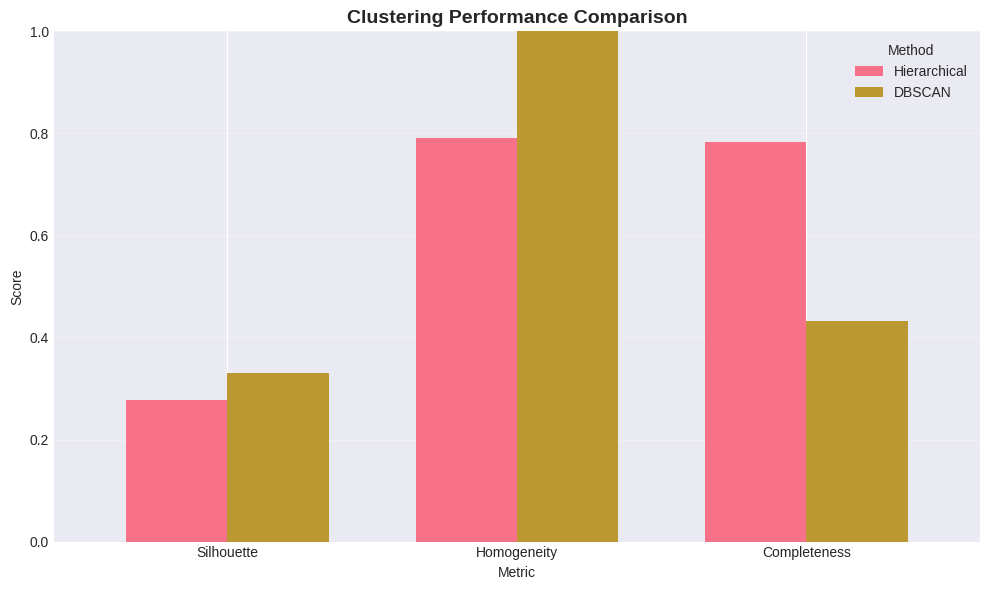

In [9]:
print("\n" + "="*70)
print(" ANALYSIS AND INSIGHTS")
print("="*70)

# Compare best results from both methods
best_hierarchical = max(hierarchical_results.items(),
                        key=lambda x: x[1]['silhouette'])
n_clust_best = best_hierarchical[0]
hier_metrics = best_hierarchical[1]

print("\n4.1 COMPARISON OF CLUSTERING METHODS")
print("-" * 70)
print(f"\nBest Hierarchical Clustering (n_clusters={n_clust_best}):")
print(f"   Silhouette Score: {hier_metrics['silhouette']:.4f}")
print(f"   Homogeneity Score: {hier_metrics['homogeneity']:.4f}")
print(f"   Completeness Score: {hier_metrics['completeness']:.4f}")

print(f"\nBest DBSCAN Clustering:")
print(f"   Silhouette Score: {best_dbscan['silhouette']:.4f}")
print(f"   Homogeneity Score: {best_dbscan['homogeneity']:.4f}")
print(f"   Completeness Score: {best_dbscan['completeness']:.4f}")

# Visualization comparing metrics
metrics_comparison = pd.DataFrame({
    'Hierarchical': [hier_metrics['silhouette'],
                     hier_metrics['homogeneity'],
                     hier_metrics['completeness']],
    'DBSCAN': [best_dbscan['silhouette'],
               best_dbscan['homogeneity'],
               best_dbscan['completeness']]
}, index=['Silhouette', 'Homogeneity', 'Completeness'])

fig, ax = plt.subplots(figsize=(10, 6))
metrics_comparison.plot(kind='bar', ax=ax, width=0.7)
ax.set_title('Clustering Performance Comparison', fontsize=14, fontweight='bold')
ax.set_ylabel('Score')
ax.set_xlabel('Metric')
ax.set_ylim([0, 1])
ax.legend(title='Method')
ax.grid(axis='y', alpha=0.3)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

